#All neededed librarys

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits
from astropy.modeling.models import Gaussian2D
import glob
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from clustar.core import ClustarData
from astropy.visualization import ZScaleInterval
from astropy.io import fits


In [ ]:
#Define global variables

In [122]:
im_size = 100
shift_interval = 1

gaussians = []


Define Size of image in pixels and object in image
The object is a standard object from astropy, the idea is to use one of our own gaussian.

Here we plot the actual image

Lets say we want to crop the image to a standard size 

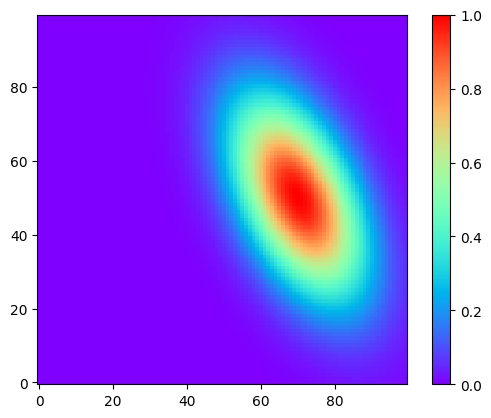

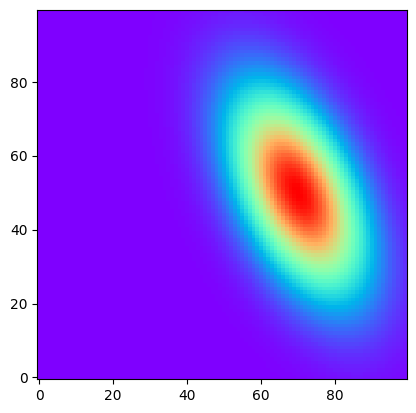

In [115]:
y, x = np.mgrid[0:500, 0:500]
data1 = Gaussian2D(1, 250, 250, 20, 10, theta=2)(x, y)
# plt.imshow(data1, origin='lower', cmap='rainbow')
# plt.colorbar()
# plt.show()

crop_center = (230, 250)
crop_size = units.Quantity((100, 100), units.pixel)
crop = Cutout2D(data1, crop_center, crop_size)

plt.imshow(crop.data, origin='lower', cmap='rainbow')
plt.colorbar()
plt.show()

zscale = ZScaleInterval(contrast=0.2, nsamples=1)
plt.imshow(zscale(crop.data),
           origin='lower', cmap='rainbow')
plt.show()

Load a FITS file instead of simulating

In [32]:
#Get all the fits files adresses un a dictionary
filenames = glob.glob('data/*.fits')
data_set = {}

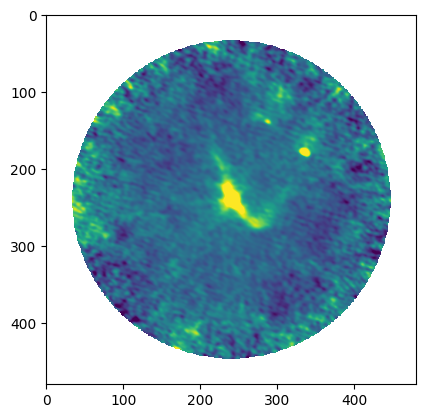

In [46]:
def fits2png(file_path):
    data = fits.getdata(file_path)
    zscale = ZScaleInterval()
    data = zscale(data).squeeze()
    return data

# Find object of interest in FITS-file and return pos 

In [41]:
def find_object_pos(file):

    cd = ClustarData(path=file, group_factor=0)
    if len(cd.groups) > 0:
        disk = cd.groups[0]
        bounds = disk.image.bounds
        x = (bounds[2] + bounds[3])/2 
        y = (bounds[0] + bounds[1])/2
        return (x, y)
    else:
        print("No object found in {}".format(file))
        return None


# Go through all the FITS adresses and print the graphs

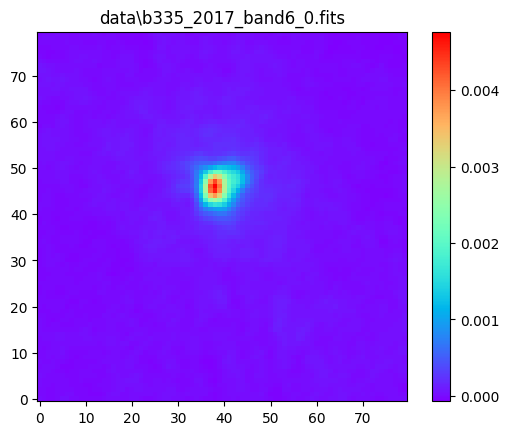

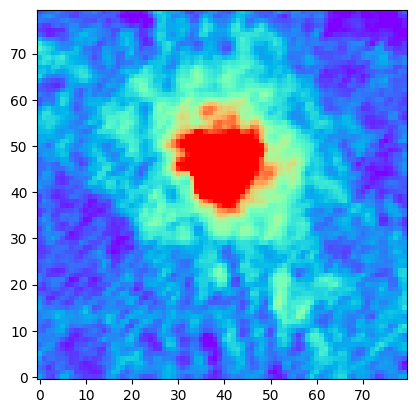

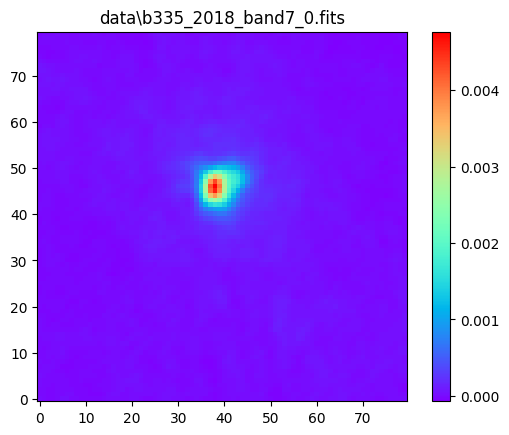

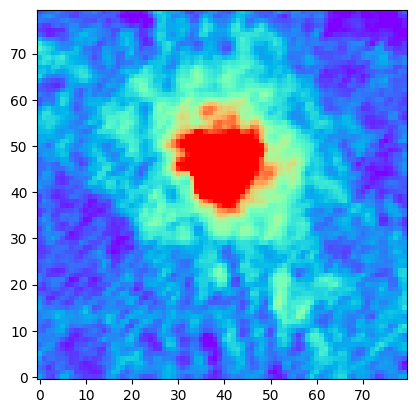

No object found in data\hh212_2015_band7_0.fits
No object found in data\hh212_2015_band7_1.fits


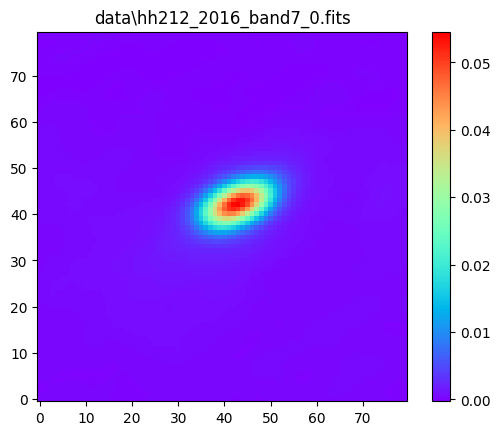

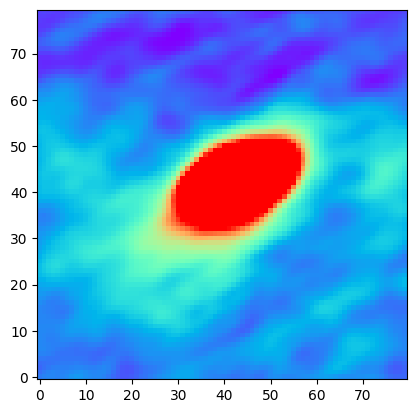

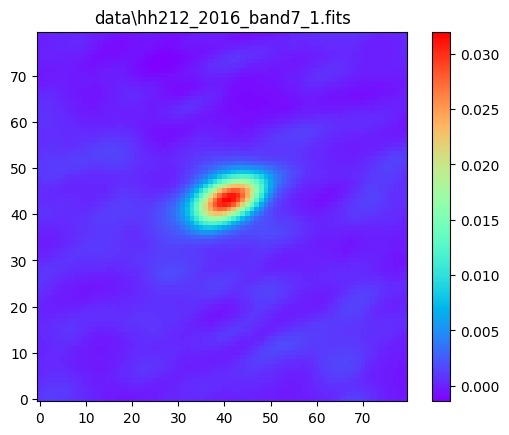

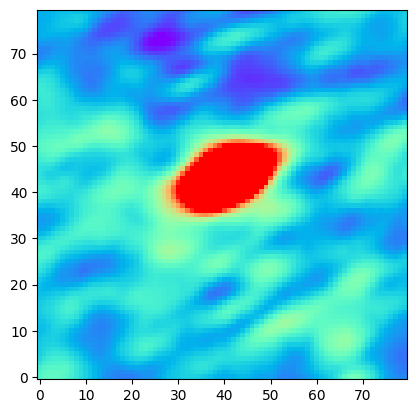

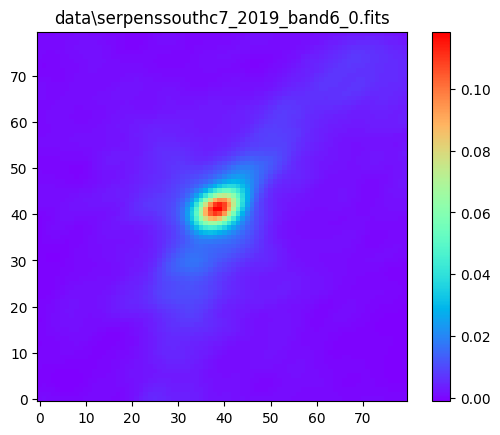

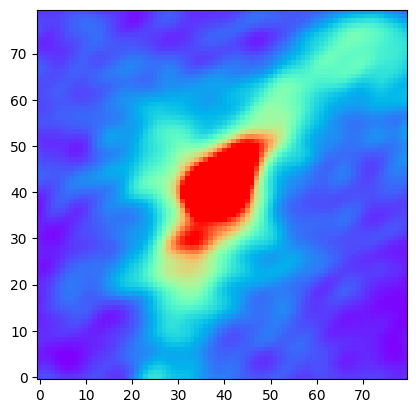

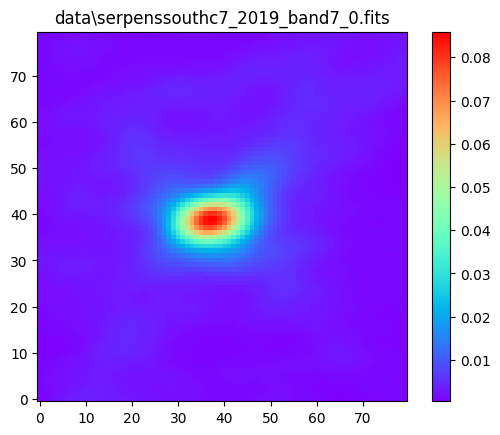

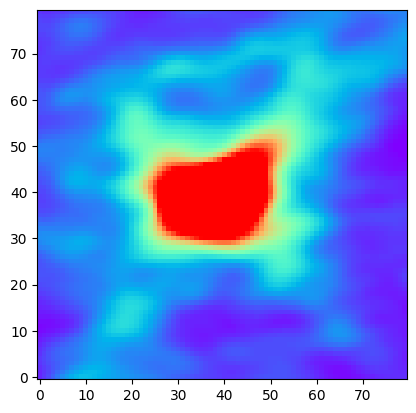

In [57]:
for file in filenames:
    img_header = fits.open(file)
    img_data = fits.getdata(file)
    object_pos = find_object_pos(file)

    if object_pos != None:

        #Data shape is (1, 1, x, y) we want it to be (x, y)
        img_data.shape = (img_data.shape[2], img_data.shape[3])

        # Set the size of the crop in pixels
        crop_size = units.Quantity((im_size, im_size), units.pixel)

        img_crop = Cutout2D(img_data, object_pos, crop_size)

        gaussians.append(img_crop)

        plt.figure()
        plt.imshow(img_crop.data, origin='lower', cmap='rainbow')
        plt.colorbar()
        plt.title(file)
        plt.show()

        zscale = ZScaleInterval()
        plt.imshow(zscale(img_crop.data).squeeze(),
                   origin='lower', cmap='rainbow')
        plt.show()


# Rotate Data

Rotate the crop by the given angle and return the rotated crop moved with ranom ofset

In [76]:
import random
from scipy.ndimage import rotate

def crop_rotated_disk(disk_to_rotate, angle):
    # Rotate the disk
    rotated_disk = rotate(disk_to_rotate, angle)
    # Since rotating pads the image, we need to crop it to the original size
    x, y = (len(rotated_disk[0]), len(rotated_disk))

    shift_interval = 8
    si = shift_interval +1 

    rand_x_shift = random.randint(-shift_interval, shift_interval)
    rand_y_shift = random.randint(-shift_interval, shift_interval)

    (x_lower, x_upper) = int((x/2 - im_size/2)) + rand_x_shift , int(x/2 + im_size/2) + rand_x_shift
    (y_lower, y_upper) = int((y/2 - im_size/2)) + rand_y_shift , int(y/2 + im_size/2) + rand_y_shift

    return rotated_disk[(x_lower+si):(x_upper-si), (y_lower+si):(y_upper-si)]
    


# Flip and mirror gaussian

In [36]:
def flip_disk(disk_to_flip):

    flipped_disk = disk_to_flip

    if bool(random.getrandbits(1)):
        flipped_disk = np.fliplr(flipped_disk)

    if bool(random.getrandbits(1)):
        flipped_disk = np.flipud(flipped_disk)

    if bool(random.getrandbits(1)):
        flipped_disk = np.flip(flipped_disk)
        
    return flipped_disk

# Print and augment data

Got through all the found objects and augment them

In [70]:
def augment(disk):
    angle = random.randint(0, 360) 
    return crop_rotated_disk(flip_disk(disk), angle)
    

In [121]:
def generate_pos_dataset(augmentations_per_gaussian):
    pos_dataset = []
    augmentations_per_gaussian = 4
    for gaussian in gaussians:
        for i in range(0, augmentations_per_gaussian):
            zscale = ZScaleInterval(contrast=0.25, nsamples=1)
            #Augment the data and add it to the dataset as png
            pos_dataset.append(zscale(augment(gaussian.data)))
    return pos_dataset

def generate_neg_dataset():
    im_lenght = shift_interval*2+2
    y, x = np.mgrid[0:im_lenght, 0:im_lenght]

    #Generate a gaussian with a random center
    rand_x = random.randint(shift_interval, im_lenght)


    data = Gaussian2D(1, 250, 250, 20, 10, theta=2)(x, y)

    zscale = ZScaleInterval(contrast=0.2, nsamples=1)
    plt.imshow(zscale(crop.data),
               origin='lower', cmap='rainbow')
    plt.show()


augmentations_per_gaussian = 4
for gaussian in gaussians:
    for i in range(0, augmentations_per_gaussian):
        plt.figure()
        plt.imshow(augment(gaussian.data), origin='lower', cmap='rainbow')
        plt.colorbar()
        plt.title("Augmented gaussian")
        plt.show()

SyntaxError: invalid syntax (4148870535.py, line 11)

# CNN

In [118]:
# importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split


In [68]:
#loading data

x = generate_pos_dataset(50)
y

X_train, X_test, y_train, y_test = train_test_split(
       x, y, test_size=.33)

(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1521 - accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0524 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0168 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 8/10
1521/1875 [=======================>......] - ETA: 4s - loss: 0.0066 - accuracy: 0.9977

KeyboardInterrupt: 